In [67]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font",size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)

In [68]:
df=pd.read_csv("/Users/wang859923/Desktop/data a.csv")
print(df.head())
print("数据集包含的数据个数%d"%df.shape[0])

   star_rating  helpful_votes  total_votes  useful  vine  verified_purchase  \
0          5.0            0.0          0.0     0.0   0.0                1.0   
1          5.0            0.0          0.0     0.0   0.0                1.0   
2          5.0            0.0          0.0     0.0   0.0                1.0   
3          5.0            0.0          0.0     0.0   0.0                1.0   
4          5.0            0.0          0.0     0.0   0.0                1.0   

   positive words  negative words  similarity  rate of words repition  \
0             2.0             0.0        0.98                    0.11   
1             1.0             0.0        0.98                    0.01   
2             1.0             0.0        0.98                    0.27   
3             2.0             0.0        0.98                    0.09   
4             1.0             0.0        0.98                    0.06   

   number of words  numbers of punctuation  types of punctuation    y  
0             

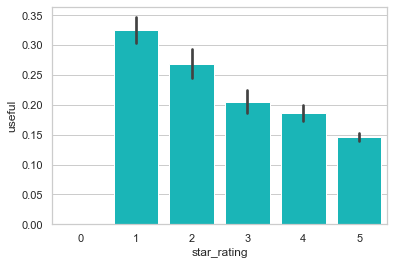

In [39]:
sns.barplot(x='star_rating',y='useful',data=df,color='darkturquoise')   #箱形图
plt.show()

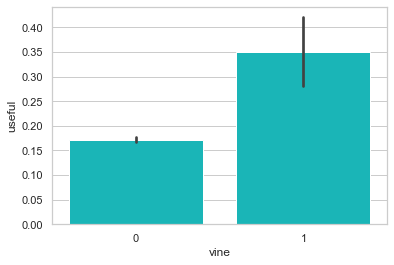

In [40]:
sns.barplot(x='vine',y='useful',data=df,color='darkturquoise')   #箱形图
plt.show()

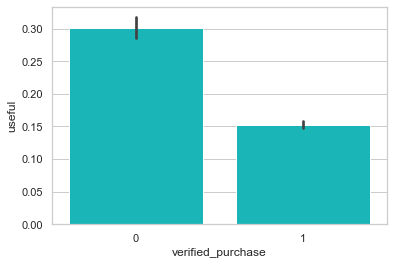

In [41]:
sns.barplot(x='verified_purchase',y='useful',data=df,color='darkturquoise')   #箱形图
plt.show()

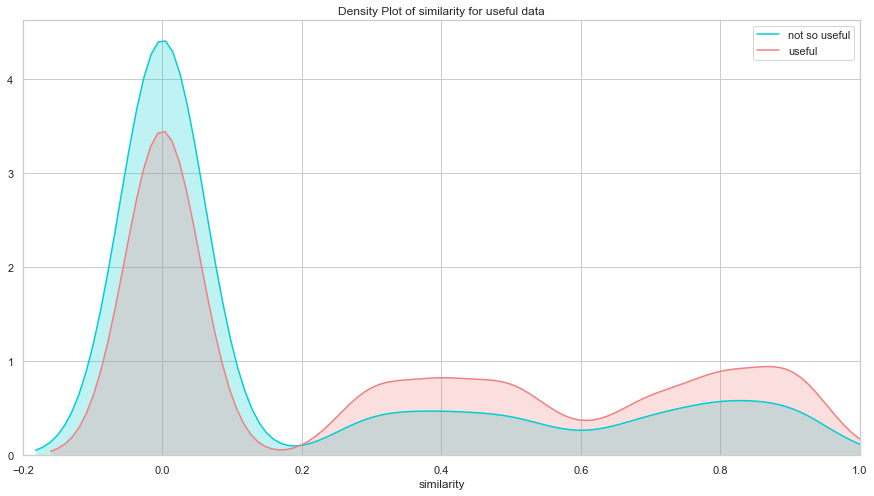

In [38]:
plt.figure(figsize=(15,8))
ax=sns.kdeplot(df['similarity'][df.useful>=0.5],color='darkturquoise',shade=True)
sns.kdeplot(df['similarity'][df.useful<0.5],color='lightcoral',shade=True)
plt.legend(['not so useful','useful'])
plt.title('Density Plot of similarity for useful data')
ax.set(xlabel='similarity')
plt.xlim(-0.2,1)
plt.show()

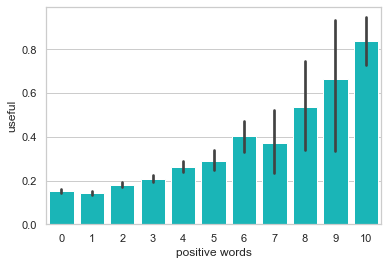

In [42]:
sns.barplot(x='positive words',y='useful',data=df,color='darkturquoise')   #箱形图
plt.show()

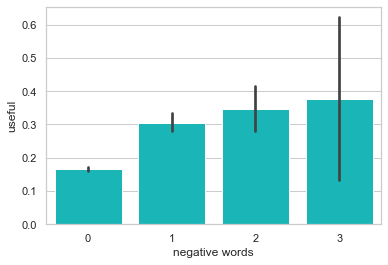

In [43]:
sns.barplot(x='negative words',y='useful',data=df,color='darkturquoise')   #箱形图
plt.show()

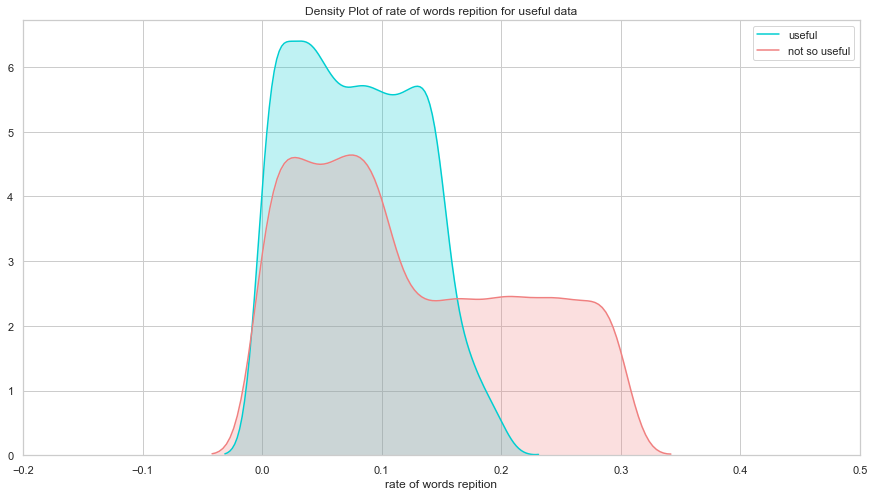

In [46]:
plt.figure(figsize=(15,8))
ax=sns.kdeplot(df['rate of words repition'][df.useful>=0.5],color='darkturquoise',shade=True)
sns.kdeplot(df['rate of words repition'][df.useful<0.5],color='lightcoral',shade=True)
plt.legend(['useful','not so useful'])
plt.title('Density Plot of rate of words repition for useful data')
ax.set(xlabel='rate of words repition')
plt.xlim(-0.2,0.5)
plt.show()

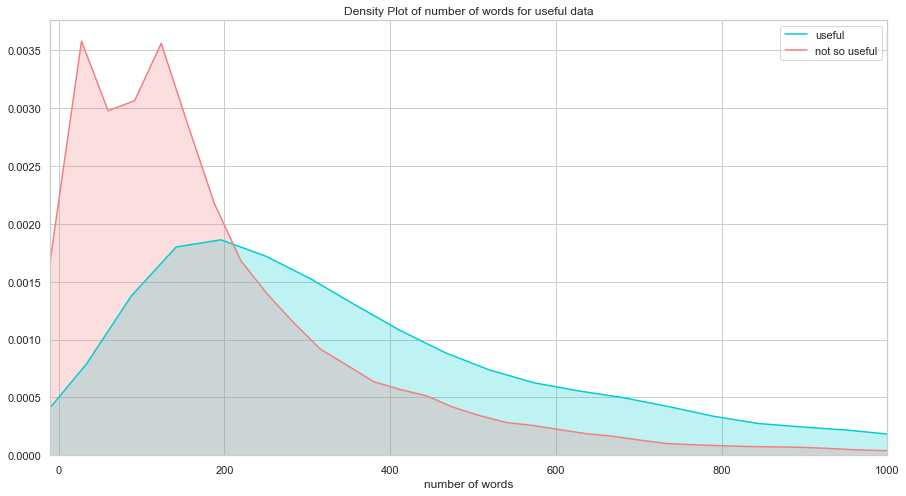

In [53]:
plt.figure(figsize=(15,8))
ax=sns.kdeplot(df['number of words'][df.useful>=0.5],color='darkturquoise',shade=True)
sns.kdeplot(df['number of words'][df.useful<0.5],color='lightcoral',shade=True)
plt.legend(['useful','not so useful'])
plt.title('Density Plot of number of words for useful data')
ax.set(xlabel='number of words')
plt.xlim(-10,1000)
plt.show()


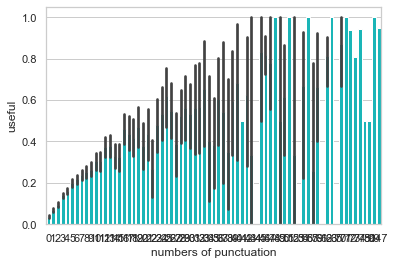

In [54]:
sns.barplot(x='numbers of punctuation',y='useful',data=df,color='darkturquoise')   #箱形图
plt.show()

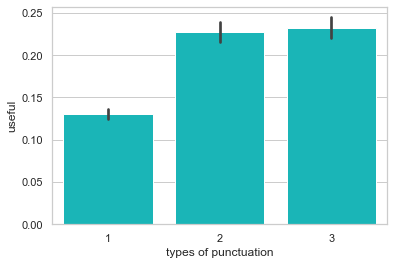

In [55]:
sns.barplot(x='types of punctuation',y='useful',data=df,color='darkturquoise')   #箱形图
plt.show()

In [96]:

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score,precision_score,f1_score
from sklearn.metrics import roc_auc_score

col=['star_rating','vine','verified_purchase','positive words','negative words','similarity','rate of words repition','number of words','numbers of punctuation','types of punctuation']

x=df[col]
y=df['y']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

logit=sm.Logit(y_train,x_train)
result = logit.fit()
print(result.summary())



Optimization terminated successfully.
         Current function value: 0.401161
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                15152
Model:                          Logit   Df Residuals:                    15142
Method:                           MLE   Df Model:                            9
Date:                Sat, 07 Mar 2020   Pseudo R-squ.:                  0.1908
Time:                        07:54:02   Log-Likelihood:                -6078.4
converged:                       True   LL-Null:                       -7511.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
star_rating               -0.2435      0.014    -16.877      0.000      -0.272      

In [ ]:
y_pred=np.where(y_pred>0.5,1,0)
print('The accuracy is %2.3f'%accuracy_score(y_test,y_pred))
print('the auc is %2.3f '%roc_auc_score(y_test,y_pred))
print(logi.intercept)

In [116]:
import datetime
import warnings
import numpy as np
from matplotlib import cm, pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator
from hmmlearn.hmm import GaussianHMM

      date  reputation
0  37664.0     0.25050
1  38081.0     0.81175
2  38393.0     0.73860
3  38415.0     0.35050
4  38505.0     0.88910


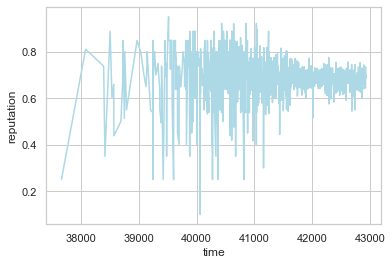

In [150]:
data= pd.read_csv("/Users/wang859923/Desktop/pacifier b.csv")
print(data.head())
fig1 = plt.figure()
plt.plot(data['date'],data['reputation'],color='lightblue')
plt.xlabel("time")
plt.ylabel("reputation")
plt.show()

In [205]:
hmm = GaussianHMM(n_components =10, covariance_type = 'diag', n_iter = 10000)
with warnings.catch_warnings():
   warnings.simplefilter('ignore')
   hmm.fit(data)

In [206]:
hmm.decode(data, lengths=None, algorithm=None)

(-5446.661822374045, array([4, 4, 4, ..., 2, 2, 2]))

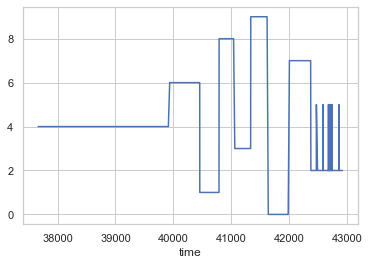

In [207]:
y = hmm.predict(data) 
plt.figure()
plt.xlabel("time")
plt.plot(data['date'],y)


In [180]:
hmm.score(data, lengths=None) 

-5690.929591746836

In [182]:
hmm.transmat_

array([[9.93662135e-001, 0.00000000e+000, 1.42627902e-175,
        0.00000000e+000, 6.33786507e-003, 1.75763588e-056,
        0.00000000e+000],
       [0.00000000e+000, 9.93926676e-001, 6.07332411e-003,
        2.19206537e-133, 0.00000000e+000, 0.00000000e+000,
        5.54809549e-060],
       [0.00000000e+000, 5.00151630e-035, 9.93876708e-001,
        7.48539103e-231, 0.00000000e+000, 6.12329189e-003,
        9.23562037e-148],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        9.92021446e-001, 0.00000000e+000, 0.00000000e+000,
        7.97855350e-003],
       [1.05712732e-032, 0.00000000e+000, 2.30517599e-270,
        1.71159533e-302, 1.00000000e+000, 5.71316598e-124,
        0.00000000e+000],
       [6.74374611e-003, 3.22996190e-176, 1.02506067e-057,
        0.00000000e+000, 8.90487849e-217, 9.93256254e-001,
        6.21498473e-307],
       [0.00000000e+000, 6.13567444e-003, 0.00000000e+000,
        5.55311029e-054, 0.00000000e+000, 0.00000000e+000,
        9.93864326

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns     #seaborn画出的图更好看，且代码更简单，缺点是可塑性差
from statsmodels.graphics.tsaplots import plot_acf  #自相关图
from statsmodels.tsa.stattools import adfuller as ADF  #平稳性检测
from statsmodels.graphics.tsaplots import plot_pacf    #偏自相关图
from statsmodels.stats.diagnostic import acorr_ljungbox    #白噪声检验
from statsmodels.tsa.arima_model import ARIMA
#seaborn 是建立在matplotlib之上的
%matplotlib inline 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [211]:
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
pylab.rcParams['figure.figsize'] = (10, 6)   #设置输出图片大小
sns.set(color_codes=True) #seaborn设置背景

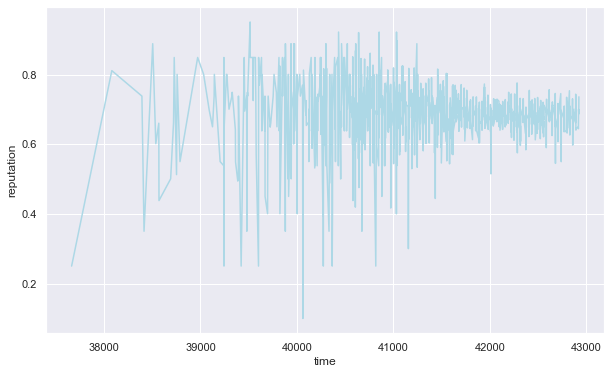

In [213]:
fig1 = plt.figure()
plt.plot(data['date'],data['reputation'],color='lightblue')
plt.xlabel("time")
plt.ylabel("reputation")
plt.show()

In [214]:
print(u'原始序列的ADF检验结果为：', ADF(data[u'reputation']))

原始序列的ADF检验结果为： (-9.828493652831611, 5.111471940206605e-17, 15, 1077, {'1%': -3.436436308605049, '5%': -2.8642273405849363, '10%': -2.568200833956216}, -2138.6457645276987)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


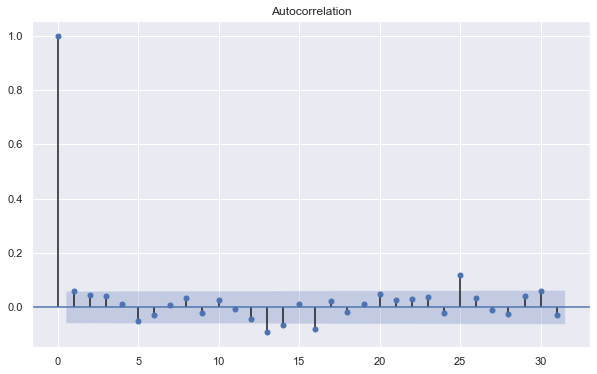

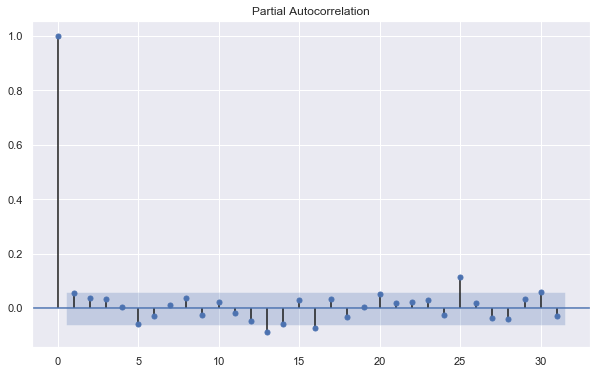

In [231]:
plot_acf(data['reputation']).show()
plot_pacf(data['reputation']).show()

-2102.3961918924874 -2082.413127267268 -2094.8337508424447


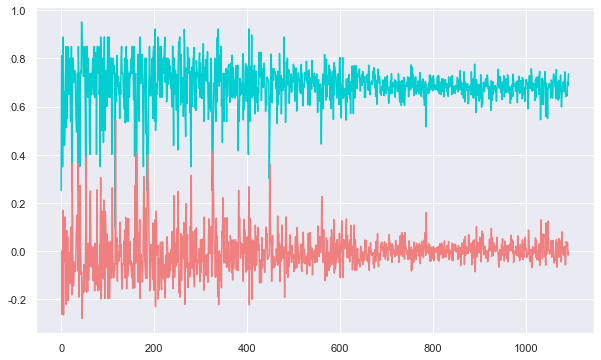

In [232]:
arima = ARIMA(data['reputation'], order=(1, 1, 1))
result = arima.fit(disp=False)
print(result.aic, result.bic, result.hqic)

plt.plot(data['reputation'],color='darkturquoise')
plt.plot(result.fittedvalues, color='lightcoral')
plt.show()


In [293]:
f1 = np.polyfit(data['date']/800000, log(data['reputation']+1.5),7)
p1 = np.poly1d(f1)
print(p1)

yvals1 = p1(data['date']/800000)

            7             6             5             4             3
-7.026e+14 x + 1.796e+14 x - 1.643e+13 x + 4.464e+11 x + 2.621e+10 x
              2
 - 2.315e+09 x + 6.532e+07 x - 6.665e+05


/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


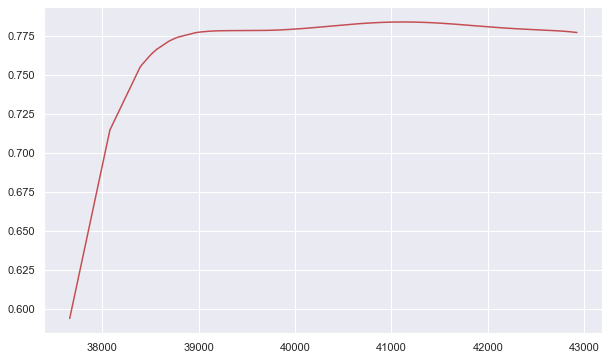

In [294]:
plot2 = plt.plot(data['date'], yvals1, 'r',label='polyfit values')

plt.show()

In [339]:
import matplotlib.pyplot as plt
import seaborn as sns
data= pd.read_csv("/Users/wang859923/Desktop/d.csv")
print(data.head())

   star_rating  helpful_votes  total_votes  useful  vine  verified_purchase  \
0            1              2            2     1.0     0                  0   
1            4              1            1     1.0     0                  0   
2            5              0            0     0.0     0                  0   
3            5              6            6     1.0     0                  0   
4            2              0            0     0.0     0                  0   

   positive words  negative words   emotion  positive-hierachy  \
0               0               0  0.301030                  1   
1               2               0  0.602060                  1   
2               5               0  0.845098                  3   
3               1               0  0.477121                  1   
4               0               0  0.301030                  1   

   negative-hierachy  similarity  rate of words repition  number of words  \
0                  0         0.0                   

In [337]:
col = {'rating-p','useful','vine','positive words','negative words','emotion','rate of words repition','number of words','numbers of punctuation','types of punctuation'}
data = data[col]

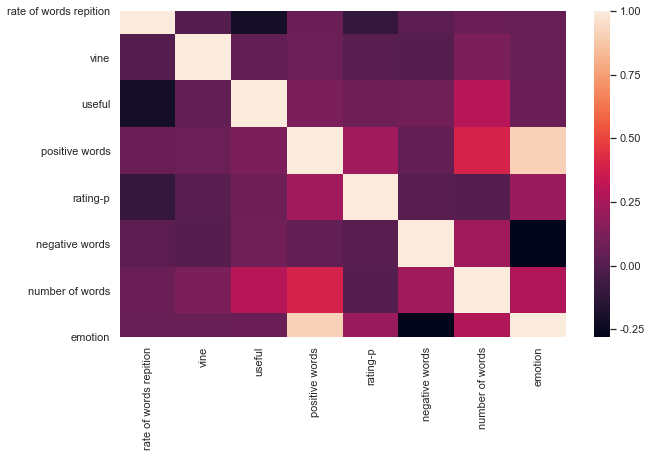

In [331]:
sns.heatmap(data.corr())
plt.show()


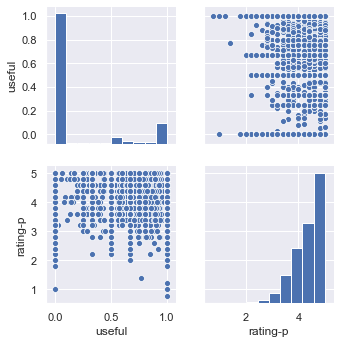

In [310]:
sns.pairplot(data) 

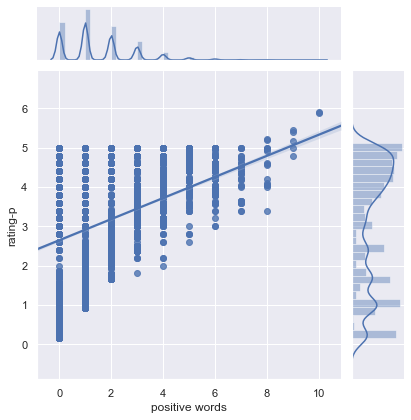

In [332]:
sns.jointplot(x = 'positive words', y = 'rating-p', data = data ,kind = 'reg')

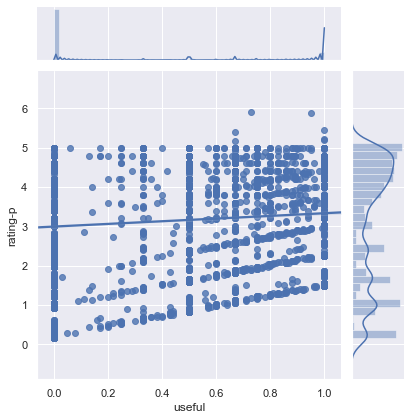

In [333]:
sns.jointplot(x = 'useful', y = 'rating-p', data = data ,kind = 'reg')

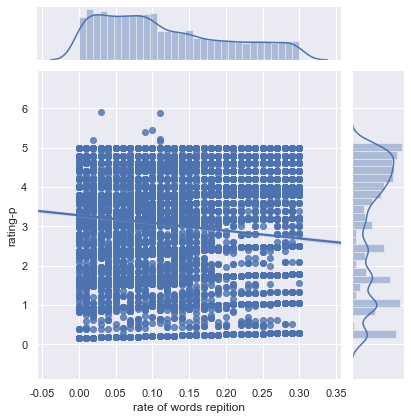

In [334]:
sns.jointplot(x = 'rate of words repition', y = 'rating-p', data = data ,kind = 'reg')

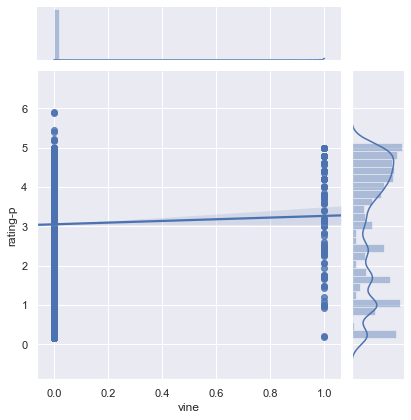

In [335]:
sns.jointplot(x = 'vine', y = 'rating-p', data = data ,kind = 'reg')

In [340]:
col = {'positive-hierachy','negative-hierachy','star_rating'}
data = data[col]
data.corr('spearman') 

,positive-hierachy,star_rating,negative-hierachy
positive-hierachy,1.000000,0.106082,0.040338
star_rating,0.106082,1.000000,-0.214410
negative-hierachy,0.040338,-0.214410,1.000000
